# EX 2.2

In [ ]:
import time as t
import robot
# Create a robot object and initialize
arlo = robot.Robot()

print("Running ...")

starttime = t.time()
pic = 0

while (pic < 5):
  if (t.time() - starttime > pic):
    pic += 1
    print(arlo.read_front_ping_sensor())
  t.sleep(0.1)

[112 100]


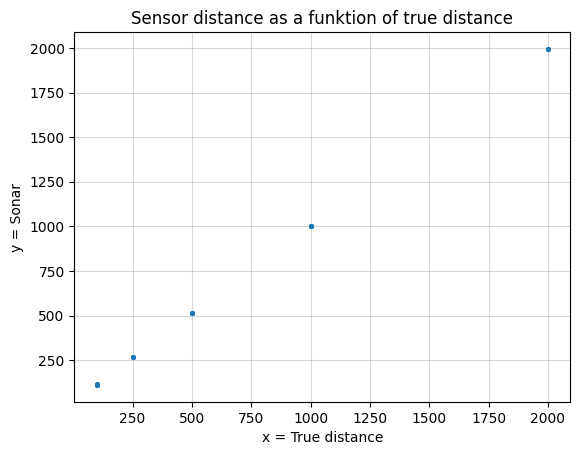

In [77]:
import matplotlib.pyplot as plt
import numpy as np

Wall = np.array([[115, 115, 111, 111, 112, 269, 268, 268, 268, 268, 512, 512, 512, 512, 512, 1003, 1003, 1003, 1003, 1003, 1995, 1994, 1995, 1994, 1995],
                 [100, 100, 100, 100, 100, 250, 250, 250, 250, 250, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 2000]])

Jacket = np.array([[112, 108, 108, 108, 109, 274, 276, 276, 274, 275, 504, 504, 504, 504, 504, 1001, 997, 997, 998, 997, 2011, 2010, 2009, 2011, 2011],
                   [100, 100, 100, 100, 100, 250, 250, 250, 250, 250, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 2000]])

x = Wall[1]
y = Wall[0]
print(np.array([112, 100]))

# Initialise figure (fig) and axis (ax)
fig, ax = plt.subplots()#figsize=(8,5))

# Plot in axis, add label to data
dotSize = 5
ax.plot(x, y, '.', markersize=dotSize, label='x, y') 

# Set labels and title
ax.set_xlabel('x = True distance')
ax.set_ylabel('y = Sonar')

ax.set_title(f'Sensor distance as a funktion of true distance')
# Add grid
ax.grid(alpha=0.5)
# Set axes limits
#ax.set_ylim(0,35)
#ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.5, -0.25),
#           ncol=1, fancybox=True, shadow=False)
# Show plot
plt.show()
# Add legend (remember to label the data as shown above (*))
# Save plot to some local path
#fig.savefig(f'Reg_plot_lin.png', bbox_inches='tight')

In [99]:
import numpy as np

targets = {
    'Target 10': [115, 111, 111, 111, 112],
    'Target 25': [269, 268, 268, 268, 268],
    'Target 50': [512, 512, 512, 512, 512],
    'Target 100': [1003, 1003, 1003, 1003, 1003],
    'Target 200': [1995, 1994, 1995, 1994, 1995],
    'Target 200 soft': [2011, 2010, 2009, 2011, 2011],
    'Target 100 soft': [1001, 997, 997, 998, 997],
    'Target 50 soft': [504, 504, 504, 504, 504],
    'Target 25 soft': [274, 276, 276, 274, 275],
    'Target 10 soft': [112, 108, 108, 108, 109]
}

# Compute standard deviations
distances = []
std_devs = []

for target, measurements in targets.items():
    std_dev = np.std(measurements)
    distances.append(target)
    std_devs.append(std_dev)

    print(target, '\n', std_dev, '\n')

Target 10 
 1.5491933384829668 

Target 25 
 0.4 

Target 50 
 0.0 

Target 100 
 0.0 

Target 200 
 0.4898979485566356 

Target 200 soft 
 0.8 

Target 100 soft 
 1.5491933384829668 

Target 50 soft 
 0.0 

Target 25 soft 
 0.8944271909999159 

Target 10 soft 
 1.5491933384829668 



# EX 2.3

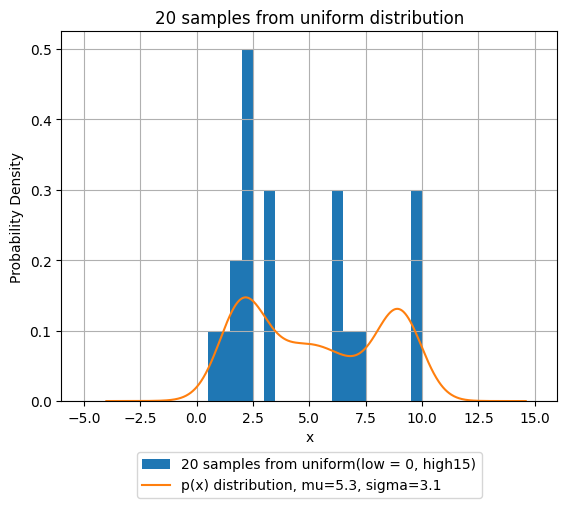

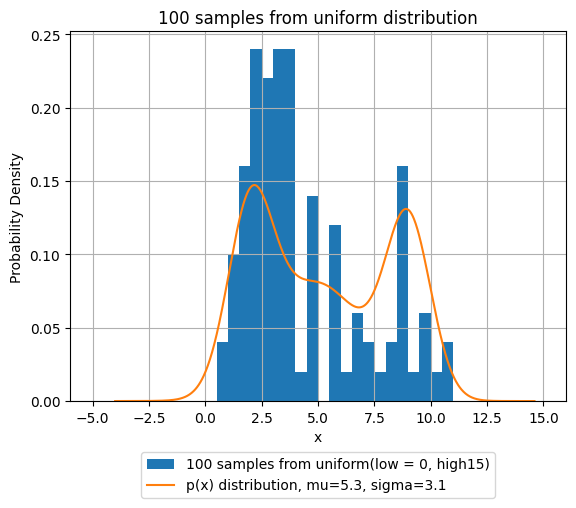

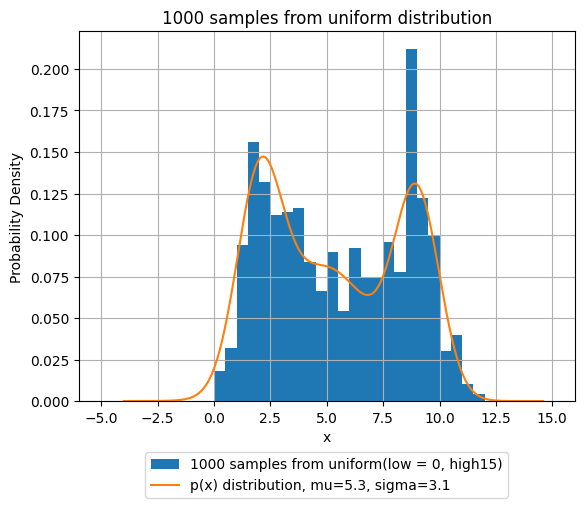

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def N(x,mu,sigma): return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
M = [[0.3, 2.0, 1.0], [0.4, 5.0, 2.0], [0.3, 9.0, 1.0]]
def p(x): return sum(list(map(lambda m: m[0]*N(x,m[1],m[2]),M)))
p_mu = 0.3*2 + 0.4*5 + 0.3*9
p_sigma = np.sqrt(sum(list(map(lambda m: m[0] * (m[2]**2 + (m[1] - p_mu)**2),M))))

for num_samples in (20,100,1000):  
    bins = 40
    a = 0
    b = 15
    samples = np.random.uniform(a, b, num_samples)
    q =  1/(b-a)
    weights = p(samples)/q
    Weighted_choise = random.choices(samples,weights, k = num_samples)
    
    #Generate x values from -3σ to +3σ
    x = np.linspace(p_mu - 3*p_sigma, p_mu + 3*p_sigma, 1000)

    #Plot
    plt.hist(Weighted_choise,bins,(-5,15), density=True, label=f'{num_samples} samples from uniform(low = {a}, high{b})')
    plt.plot(x, p(x), label=f'p(x) distribution, mu={p_mu}, sigma={p_sigma}')
    plt.title(f'{num_samples} samples from uniform distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=1, fancybox=True, shadow=False)
    plt.grid(True)
    plt.show()

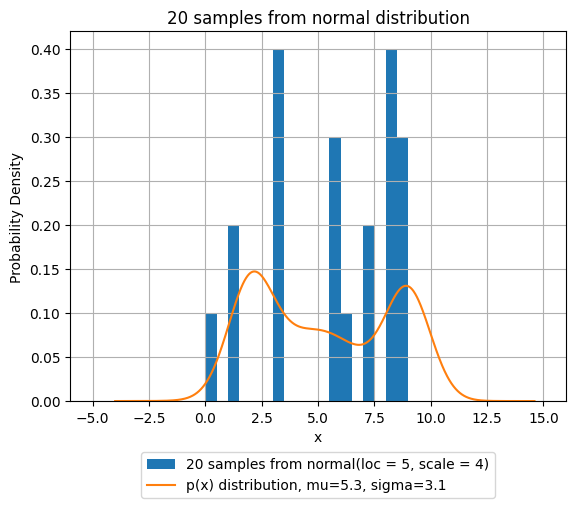

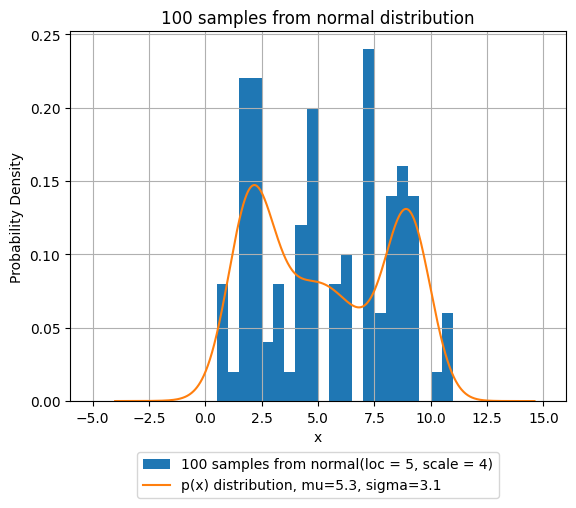

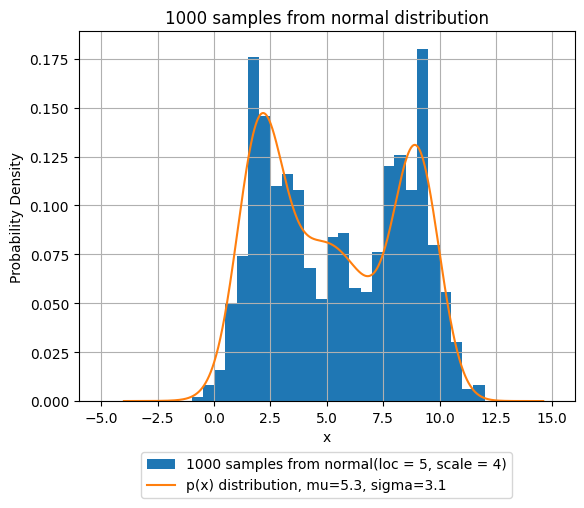

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def N(x,mu,sigma): return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
M = [[0.3, 2.0, 1.0], [0.4, 5.0, 2.0], [0.3, 9.0, 1.0]]
def p(x): return sum(list(map(lambda m: m[0]*N(x,m[1],m[2]),M)))
p_mu = 0.3*2 + 0.4*5 + 0.3*9
p_sigma = np.sqrt(sum(list(map(lambda m: m[0] * (m[2]**2 + (m[1] - p_mu)**2),M))))

for num_samples in (20,100,1000):  
    bins = 40
    loc = 5
    scale = 4
    samples = np.random.normal(loc, scale, num_samples)
    q = N(samples, loc, scale) 
    weights = p(samples)/q
    Weighted_choise = random.choices(samples,weights, k = num_samples)
    
    #Generate x values from -3σ to +3σ
    x = np.linspace(p_mu - 3*p_sigma, p_mu + 3*p_sigma, 1000)

    #Plot
    plt.hist(Weighted_choise,bins,(-5,15), density=True, label=f'{num_samples} samples from normal(loc = {loc}, scale = {scale})')
    plt.plot(x, p(x), label=f'p(x) distribution, mu={p_mu}, sigma={p_sigma}')
    plt.title(f'{num_samples} samples from normal distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=1, fancybox=True, shadow=False)
    plt.grid(True)
    plt.show()